# Imports

In [4]:
#Imports
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import lightgbm as lgb
from scipy.stats import spearmanr

sns.set_style("white")
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline
set_matplotlib_formats('svg')

plt.rcParams["font.family"] = "Times New Roman" # !!!!
plt.rcParams.update({'font.size': 32})


/tmp/ipykernel_900/3791004227.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# Loading Files

In [5]:
df_config = pd.read_csv("../data/train_mixture_1m.csv")
df_config = df_config.reindex(sorted(df_config.columns), axis=1)
df_config.head()

,index,train_slimpajama_arxiv,train_slimpajama_books,train_slimpajama_c4,train_slimpajama_commoncrawl,train_slimpajama_github,train_slimpajama_stackexchange,train_slimpajama_wikipedia
0,1,0.0058,0.0000,0.2208,0.0770,0.5568,0.1256,0.0140
1,2,0.0000,0.0000,0.6692,0.2956,0.0344,0.0002,0.0008
2,3,0.1688,0.5944,0.1310,0.0326,0.0688,0.0014,0.0030
3,4,0.0000,0.0466,0.0188,0.9308,0.0000,0.0038,0.0000
4,5,0.0346,0.0366,0.2232,0.3452,0.1050,0.0182,0.2372


In [6]:
df_wandb = pd.read_csv("../data/train_loss_1m.csv")
df_wandb = df_wandb.reindex(sorted(df_wandb.columns), axis=1)
df_wandb.head()


,index,metric/task_arc_challenge_val_loss,metric/task_arc_easy_val_loss,metric/task_commoncrawl_val_loss,metric/task_gsm8k_val_loss,metric/task_hellaswag_val_loss,metric/task_kodcode_val_loss,metric/task_logiqa_val_loss,metric/task_piqa_val_loss,metric/task_sciq_val_loss
0,1,5.635810,5.663132,5.762697,6.089487,5.458221,3.292549,5.442768,5.691467,5.811513
1,2,5.240105,5.237918,5.314171,5.825181,5.194542,3.968018,5.089413,5.296780,5.355693
2,3,5.543845,5.539248,5.622282,5.987230,5.353801,3.543343,5.321910,5.532897,5.595422
3,4,5.170885,5.159648,5.251696,5.877676,5.500048,4.572677,5.152486,5.858929,5.389435
4,5,5.411662,5.439966,5.404464,5.841198,5.362802,3.641754,5.231899,5.591645,5.509946


In [7]:
X_train = df_config[df_config.columns[1:]].values
X_train.shape

(512, 7)

In [8]:
y_train = df_wandb[df_wandb.columns[1:]].values
y_train.shape

(512, 9)

In [9]:
df_config = pd.read_csv("../data/test_mixture_1m.csv")
df_config = df_config.reindex(sorted(df_config.columns), axis=1)
# df_config = df_config.head(105)
df_config

,index,train_slimpajama_arxiv,train_slimpajama_books,train_slimpajama_c4,train_slimpajama_commoncrawl,train_slimpajama_github,train_slimpajama_stackexchange,train_slimpajama_wikipedia
0,513,0.0000,0.0060,0.0000,0.9940,0.0000,0.0000,0.0000
1,514,0.4002,0.0000,0.0000,0.5998,0.0000,0.0000,0.0000
2,515,0.0184,0.0000,0.7178,0.1672,0.0966,0.0000,0.0000
3,516,0.0288,0.0020,0.1550,0.0646,0.6304,0.0138,0.1056
4,517,0.0024,0.1864,0.0728,0.6736,0.0044,0.0264,0.0344
...,...,...,...,...,...,...,...,...
251,764,0.0818,0.0000,0.1734,0.0050,0.7380,0.0018,0.0000
252,765,0.0212,0.0386,0.0156,0.7382,0.0484,0.1380,0.0000
253,766,0.0178,0.0000,0.1852,0.7910,0.0000,0.0000,0.0062
254,767,0.0068,0.4370,0.0236,0.3788,0.0116,0.0042,0.1380


In [10]:
df_wandb = pd.read_csv("../data/test_loss_1m.csv")
df_wandb = df_wandb.reindex(sorted(df_wandb.columns), axis=1)
df_wandb

,index,metric/task_arc_challenge_val_loss,metric/task_arc_easy_val_loss,metric/task_commoncrawl_val_loss,metric/task_gsm8k_val_loss,metric/task_hellaswag_val_loss,metric/task_kodcode_val_loss,metric/task_logiqa_val_loss,metric/task_piqa_val_loss,metric/task_sciq_val_loss
0,513,5.208562,5.184857,5.261747,5.993699,5.547644,5.413623,5.169127,5.983810,5.420104
1,514,5.409931,5.396544,5.426983,6.000245,5.569176,4.968148,5.301896,6.138541,5.537538
2,515,5.235267,5.239695,5.365176,5.855783,5.165955,3.704564,5.088814,5.288875,5.386473
3,516,5.678030,5.689985,5.821479,6.168047,5.551024,3.360867,5.536510,5.842158,5.872158
4,517,5.174944,5.166510,5.268994,5.872822,5.379920,3.979941,5.146380,5.692791,5.380160
...,...,...,...,...,...,...,...,...,...,...
251,764,5.854043,5.871749,6.020448,6.256524,5.620724,3.326420,5.595518,5.881549,6.015852
252,765,5.282846,5.277015,5.333117,5.891191,5.490688,3.575419,5.200976,5.935520,5.470860
253,766,5.114433,5.090785,5.249883,5.873069,5.345197,5.051066,5.108263,5.535199,5.341094
254,767,5.238075,5.210969,5.320787,5.811822,5.440014,4.017979,5.211684,5.832178,5.449410


In [11]:
X_test = df_config[df_config.columns[1:]].values
X_test.shape


(256, 7)

In [12]:
y_test = df_wandb[df_wandb.columns[1:]].values
y_test.shape

(256, 9)

In [13]:
KEY_METRICS = df_wandb.columns[1:].tolist()
KEY_METRICS

['metric/task_arc_challenge_val_loss',
 'metric/task_arc_easy_val_loss',
 'metric/task_commoncrawl_val_loss',
 'metric/task_gsm8k_val_loss',
 'metric/task_hellaswag_val_loss',
 'metric/task_kodcode_val_loss',
 'metric/task_logiqa_val_loss',
 'metric/task_piqa_val_loss',
 'metric/task_sciq_val_loss']

# Fitting

In [14]:
import numpy as np
import lightgbm as lgb
from scipy.stats import spearmanr

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    "num_iterations": 1000,
    'seed': 42,
    'learning_rate': 1e-2,
    "verbosity": -1,
}

np.random.seed(42)

# Define the metrics to predict
commoncrawl_idx = KEY_METRICS.index('metric/task_commoncrawl_val_loss')

# Define all available reasoning task metrics
all_reasoning_metrics = {
    'gsm8k': 'metric/task_gsm8k_val_loss',
    'sciq': 'metric/task_sciq_val_loss',
    'arc_easy': 'metric/task_arc_easy_val_loss',
    'arc_challenge': 'metric/task_arc_challenge_val_loss',
    'hellaswag': 'metric/task_hellaswag_val_loss',
    'piqa': 'metric/task_piqa_val_loss',
    'logiqa': 'metric/task_logiqa_val_loss',
    'kodcode': 'metric/task_kodcode_val_loss'
}

# Create ablation configurations
ablation_configs = {
    'T1': {
        'name': 'gsm8k+arc_easy+arc_challenge',
        'metrics': ['gsm8k', 'arc_easy', 'arc_challenge']
    },
    'T2': {
        'name': 'gsm8k+hellaswag',
        'metrics': ['gsm8k', 'hellaswag']
    },
    'T3': {
        'name': 'gsm8k+piqa',
        'metrics': ['gsm8k', 'piqa']
    },
    'T4': {
        'name': 'gsm8k+logiqa',
        'metrics': ['gsm8k', 'logiqa']
    },
    'T5': {
        'name': 'gsm8k+sciq',
        'metrics': ['gsm8k', 'sciq']
    },
    'T6': {
        'name': 'gsm8k+kodcode+arc_easy+arc_challenge',
        'metrics': ['gsm8k', 'kodcode', 'arc_easy', 'arc_challenge']
    },
    'T7': {
        'name': 'gsm8k+kodcode+hellaswag',
        'metrics': ['gsm8k', 'kodcode', 'hellaswag']
    },
    'T8': {
        'name': 'all_tasks',
        'metrics': list(all_reasoning_metrics.keys())  # All 8 tasks
    },
    'T9': {
        'name': '6_tasks_without_kodcode_gsm8k',
        'metrics': ['sciq', 'arc_easy', 'arc_challenge', 'hellaswag', 'piqa', 'logiqa']
    },

}

# Create a map from metrics to their indices
metric_to_idx = {metric: KEY_METRICS.index(metric_name) for metric, metric_name in all_reasoning_metrics.items()}


In [15]:

# Function to compute average of selected reasoning tasks
def compute_reasoning_avg(X, task_list):
    indices = [metric_to_idx[task] for task in task_list]
    return np.mean([X[:, idx] for idx in indices], axis=0)

# Dictionary to store all trained models
all_predictors = {}

# Train commoncrawl model
print("Training Commoncrawl model...")
target = y_train[:, commoncrawl_idx]
test_target = y_test[:, commoncrawl_idx]

gbm = lgb.LGBMRegressor(**hyper_params)

reg = gbm.fit(X_train, target,
    eval_set=[(X_test, test_target)],
    eval_metric='l2', callbacks=[
    lgb.early_stopping(stopping_rounds=3, verbose=False),
])
r, p = spearmanr(reg.predict(X_test), test_target)
print(f"Commoncrawl Loss Correlation: {np.round(r*100, 2)}%")

all_predictors['commoncrawl'] = reg

# Train ablation models
print("\nTraining ablation models...")
ablation_predictors = {}

for ablation_id, config in ablation_configs.items():
    print(f"\nTraining {ablation_id}: {config['name']}...")
    
    # Get the metrics for this ablation
    ablation_metrics = config['metrics']
    
    # Compute average targets for training and testing
    ablation_avg_train = compute_reasoning_avg(y_train, ablation_metrics)
    ablation_avg_test = compute_reasoning_avg(y_test, ablation_metrics)
    
    # Train the model
    gbm = lgb.LGBMRegressor(**hyper_params)
    
    reg = gbm.fit(X_train, ablation_avg_train,
        eval_set=[(X_test, ablation_avg_test)],
        eval_metric='l2', callbacks=[
        lgb.early_stopping(stopping_rounds=3, verbose=False),
    ])
    
    r, p = spearmanr(reg.predict(X_test), ablation_avg_test)
    print(f"{ablation_id} ({config['name']}) Correlation: {np.round(r*100, 2)}%")
    
    ablation_predictors[ablation_id] = reg
    all_predictors[ablation_id] = reg

# Function to make predictions with all models
def predict_all_metrics(X_new):
    results = {
        "commoncrawl_loss": all_predictors['commoncrawl'].predict(X_new)
    }
    
    # Add predictions for each ablation
    for ablation_id, config in ablation_configs.items():
        results[f"{ablation_id}_{config['name']}"] = all_predictors[ablation_id].predict(X_new)
    
    return results

print("\nAll models trained and ready for predictions.")

Training Commoncrawl model...
Commoncrawl Loss Correlation: 98.56%

Training ablation models...

Training T1: gsm8k+arc_easy+arc_challenge...
T1 (gsm8k+arc_easy+arc_challenge) Correlation: 96.61%

Training T2: gsm8k+hellaswag...
T2 (gsm8k+hellaswag) Correlation: 96.81%

Training T3: gsm8k+piqa...
T3 (gsm8k+piqa) Correlation: 97.81%

Training T4: gsm8k+logiqa...
T4 (gsm8k+logiqa) Correlation: 95.68%

Training T5: gsm8k+sciq...
T5 (gsm8k+sciq) Correlation: 96.5%

Training T6: gsm8k+kodcode+arc_easy+arc_challenge...
T6 (gsm8k+kodcode+arc_easy+arc_challenge) Correlation: 95.71%

Training T7: gsm8k+kodcode+hellaswag...
T7 (gsm8k+kodcode+hellaswag) Correlation: 96.54%

Training T8: all_tasks...
T8 (all_tasks) Correlation: 95.14%

Training T9: 6_tasks_without_kodcode_gsm8k...
T9 (6_tasks_without_kodcode_gsm8k) Correlation: 96.6%

All models trained and ready for predictions.


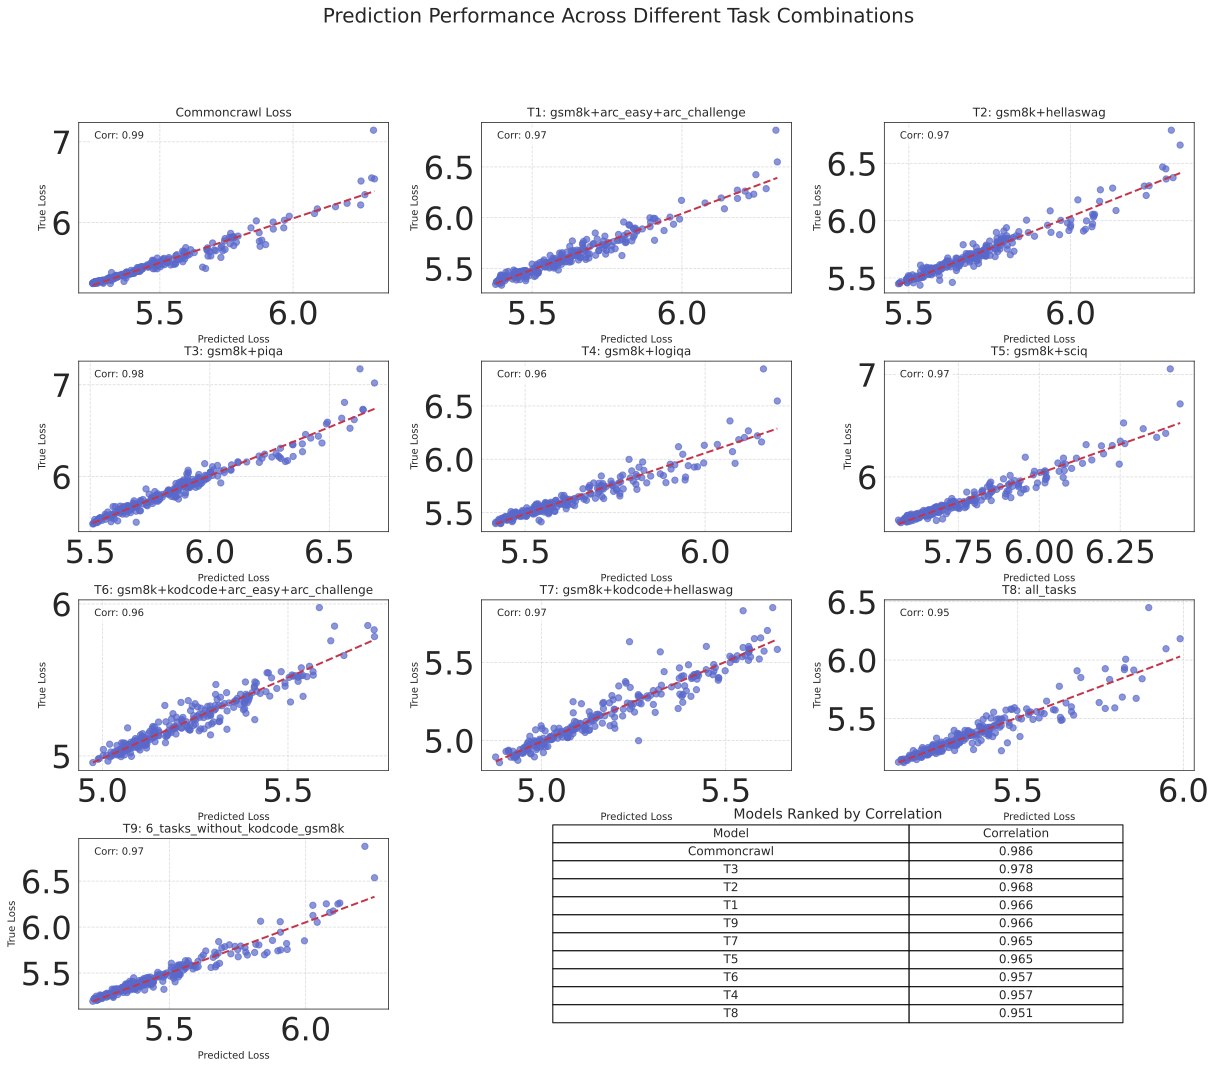

Combined visualization has been generated.


In [16]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# plot prediction performance for all models

plt.rcParams['font.family'] = 'DejaVu Sans'  # or another available font
# Function to create visualization for a specific target
def create_subplot(ax, predictor, X_test, y_true, title):
    y_pred = predictor.predict(X_test)
    
    # Create scatter plot
    ax.scatter(y_pred, y_true, s=40, color='#5969CB', alpha=0.7)
    
    # Add regression line
    m, b = np.polyfit(y_pred, y_true, 1)
    x_range = np.linspace(min(y_pred), max(y_pred), 100)
    ax.plot(x_range, m * x_range + b, color='#C3364A', linewidth=2, linestyle='dashed')
    
    # Add correlation
    r, p = spearmanr(y_pred, y_true)
    ax.text(0.05, 0.95, f'Corr: {r:.2f}', transform=ax.transAxes, 
            fontsize=10, va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Set labels and title
    ax.set_xlabel('Predicted Loss', fontsize=10)
    ax.set_ylabel('True Loss', fontsize=10)
    ax.set_title(title, fontsize=12)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    return r

# Create a large figure to hold all subplots
plt.figure(figsize=(20, 16))
grid = GridSpec(4, 3, figure=plt.gcf(), hspace=0.4, wspace=0.3)

# Keep track of correlations
correlations = {}

# Commoncrawl plot (top left)
commoncrawl_idx = KEY_METRICS.index('metric/task_commoncrawl_val_loss')
ax = plt.subplot(grid[0, 0])
correlations['Commoncrawl'] = create_subplot(
    ax=ax,
    predictor=all_predictors['commoncrawl'],
    X_test=X_test,
    y_true=y_test[:, commoncrawl_idx],
    title="Commoncrawl Loss"
)

# Plot all ablation models
positions = [(0, 1), (0, 2), 
             (1, 0), (1, 1), (1, 2), 
             (2, 0), (2, 1), (2, 2), 
             (3, 0)]

for (ablation_id, config), pos in zip(ablation_configs.items(), positions):
    # Compute the true average for this ablation
    ablation_avg_test = compute_reasoning_avg(y_test, config['metrics'])
    
    # Create visualization
    ax = plt.subplot(grid[pos[0], pos[1]])
    correlations[ablation_id] = create_subplot(
        ax=ax,
        predictor=all_predictors[ablation_id],
        X_test=X_test,
        y_true=ablation_avg_test,
        title=f"{ablation_id}: {config['name']}"
    )

# Add a table with correlation values in the empty space
ax = plt.subplot(grid[3, 1:])
ax.axis('off')

# Sort correlations for the table
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
table_data = [[model, f"{corr:.3f}"] for model, corr in sorted_correlations]

table = ax.table(
    cellText=table_data,
    colLabels=["Model", "Correlation"],
    loc='center',
    cellLoc='center',
    colWidths=[0.5, 0.3]
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
ax.set_title("Models Ranked by Correlation", fontsize=14, pad=20)

# Add a main title
plt.suptitle("Prediction Performance Across Different Task Combinations", fontsize=20, y=0.98)
plt.show()
# Save the figure
plt.savefig('../misc/all_models_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

print("Combined visualization has been generated.")

# Simulate

Sample shape: (100000, 7)

Running simulations for each ablation configuration...

Simulating for commoncrawl...
Top-128 samples shape: (128, 7)

Optimal data mixture for commoncrawl - Commoncrawl:
       Domain  Commoncrawl Weight
        arxiv            0.011382
        books            0.001577
           c4            0.050477
  commoncrawl            0.934739
       github            0.000057
stackexchange            0.000082
    wikipedia            0.001685
train_dw: "0.01,0.00,0.05,0.93,0.00,0.00,0.00"


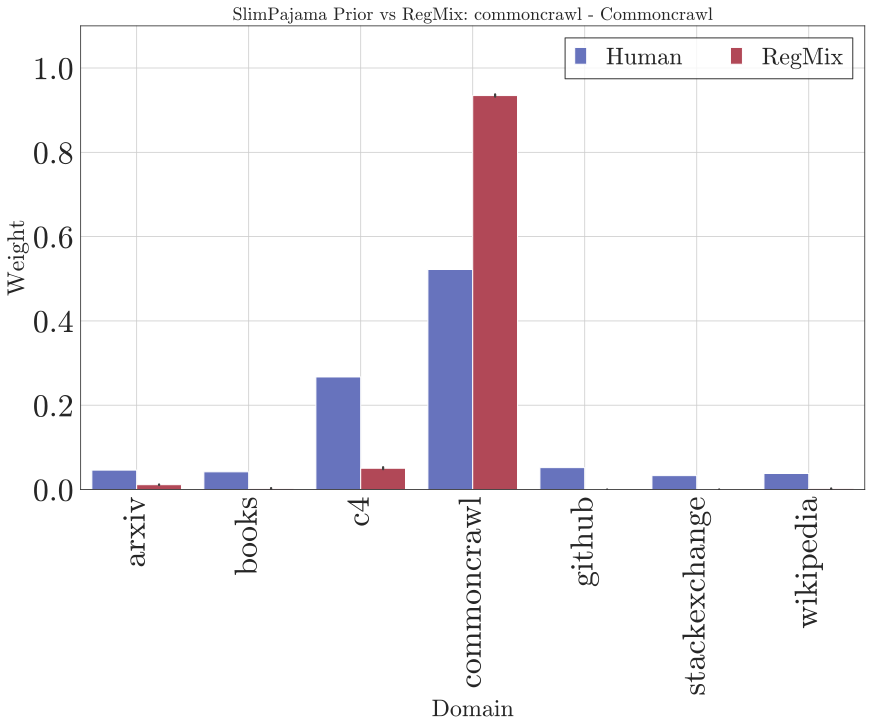


Simulating for T1...
Top-128 samples shape: (128, 7)

Optimal data mixture for T1 - gsm8k+arc_easy+arc_challenge:
       Domain  gsm8k+arc_easy+arc_challenge Weight
        arxiv                             0.009329
        books                             0.062969
           c4                             0.345613
  commoncrawl                             0.573518
       github                             0.000396
stackexchange                             0.005615
    wikipedia                             0.002559
train_dw: "0.01,0.06,0.35,0.57,0.00,0.01,0.00"


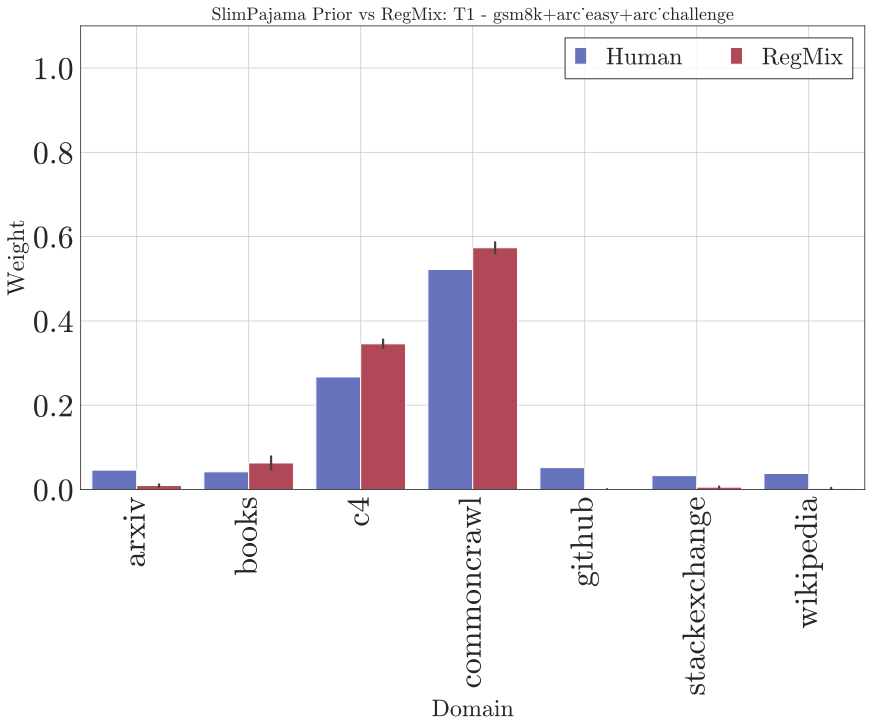


Simulating for T2...
Top-128 samples shape: (128, 7)

Optimal data mixture for T2 - gsm8k+hellaswag:
       Domain  gsm8k+hellaswag Weight
        arxiv                0.010871
        books                0.008478
           c4                0.845387
  commoncrawl                0.104320
       github                0.000586
stackexchange                0.027940
    wikipedia                0.002418
train_dw: "0.01,0.01,0.85,0.10,0.00,0.03,0.00"


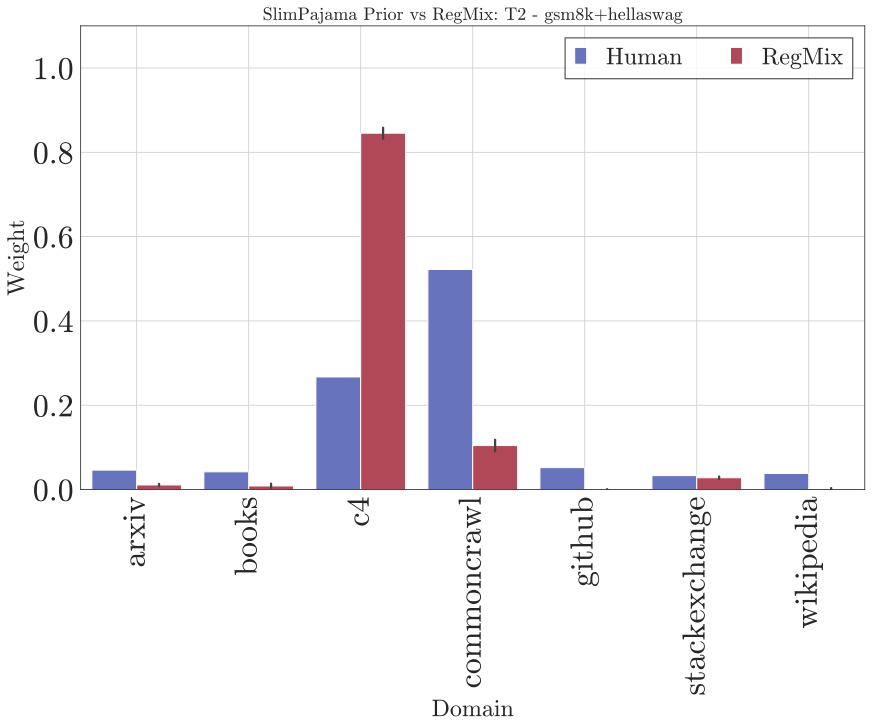


Simulating for T3...
Top-128 samples shape: (128, 7)

Optimal data mixture for T3 - gsm8k+piqa:
       Domain  gsm8k+piqa Weight
        arxiv           0.003415
        books           0.014374
           c4           0.889262
  commoncrawl           0.073177
       github           0.000652
stackexchange           0.013137
    wikipedia           0.005983
train_dw: "0.00,0.01,0.89,0.07,0.00,0.01,0.01"


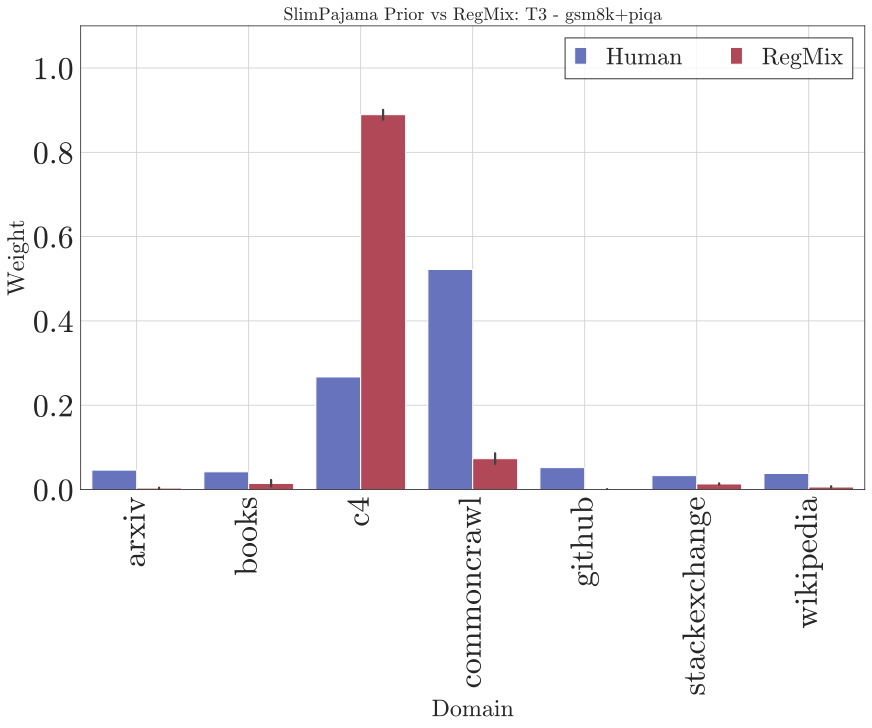


Simulating for T4...
Top-128 samples shape: (128, 7)

Optimal data mixture for T4 - gsm8k+logiqa:
       Domain  gsm8k+logiqa Weight
        arxiv             0.002853
        books             0.018543
           c4             0.899591
  commoncrawl             0.060425
       github             0.000110
stackexchange             0.016314
    wikipedia             0.002165
train_dw: "0.00,0.02,0.90,0.06,0.00,0.02,0.00"


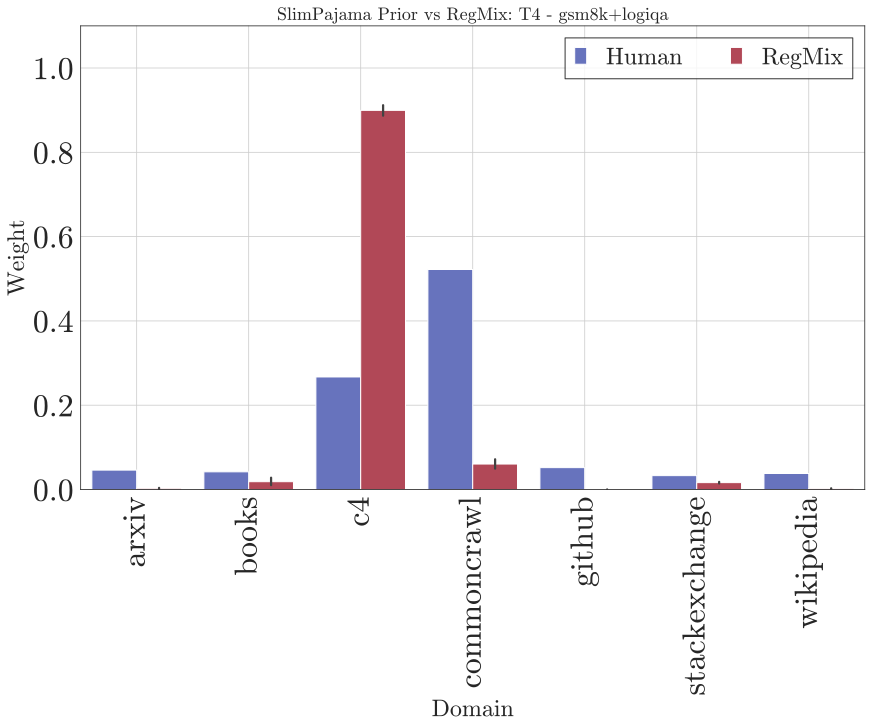


Simulating for T5...
Top-128 samples shape: (128, 7)

Optimal data mixture for T5 - gsm8k+sciq:
       Domain  gsm8k+sciq Weight
        arxiv           0.009664
        books           0.015185
           c4           0.764788
  commoncrawl           0.202571
       github           0.000299
stackexchange           0.005831
    wikipedia           0.001662
train_dw: "0.01,0.02,0.76,0.20,0.00,0.01,0.00"


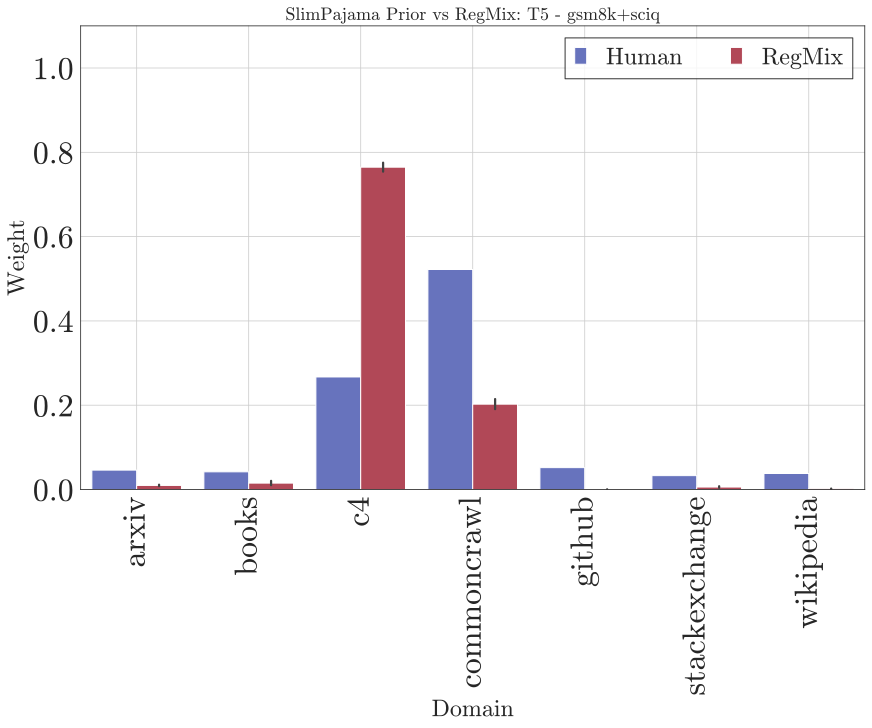


Simulating for T6...
Top-128 samples shape: (128, 7)

Optimal data mixture for T6 - gsm8k+kodcode+arc_easy+arc_challenge:
       Domain  gsm8k+kodcode+arc_easy+arc_challenge Weight
        arxiv                                     0.006824
        books                                     0.025685
           c4                                     0.266358
  commoncrawl                                     0.574274
       github                                     0.076469
stackexchange                                     0.049438
    wikipedia                                     0.000952
train_dw: "0.01,0.03,0.27,0.57,0.08,0.05,0.00"


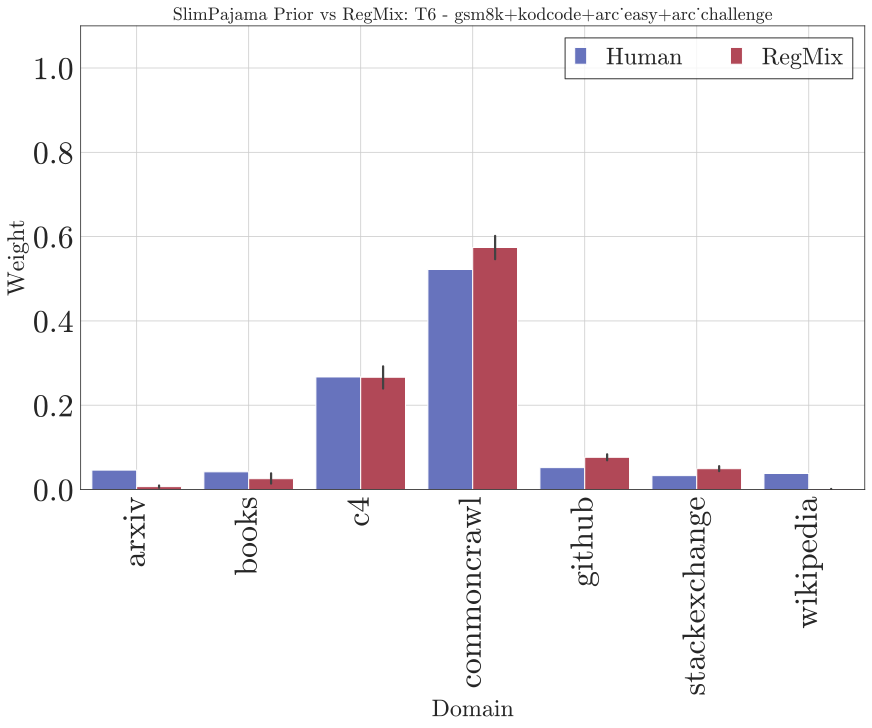


Simulating for T7...
Top-128 samples shape: (128, 7)

Optimal data mixture for T7 - gsm8k+kodcode+hellaswag:
       Domain  gsm8k+kodcode+hellaswag Weight
        arxiv                        0.004036
        books                        0.010869
           c4                        0.596907
  commoncrawl                        0.134667
       github                        0.138652
stackexchange                        0.113987
    wikipedia                        0.000881
train_dw: "0.00,0.01,0.60,0.13,0.14,0.11,0.00"


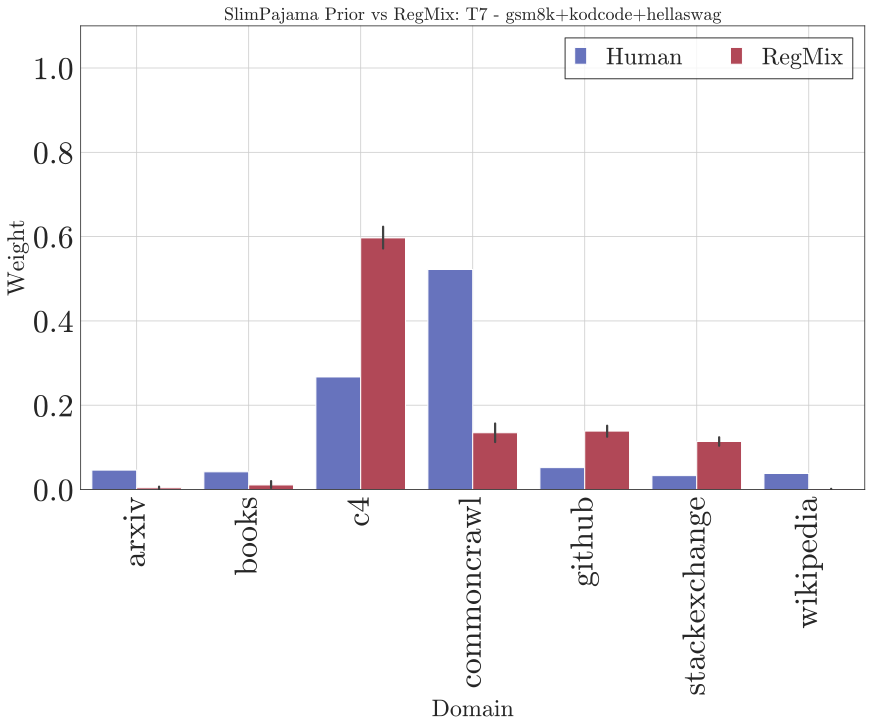


Simulating for T8...
Top-128 samples shape: (128, 7)

Optimal data mixture for T8 - all_tasks:
       Domain  all_tasks Weight
        arxiv          0.004110
        books          0.026823
           c4          0.635889
  commoncrawl          0.248944
       github          0.044954
stackexchange          0.035339
    wikipedia          0.003941
train_dw: "0.00,0.03,0.64,0.25,0.04,0.04,0.00"


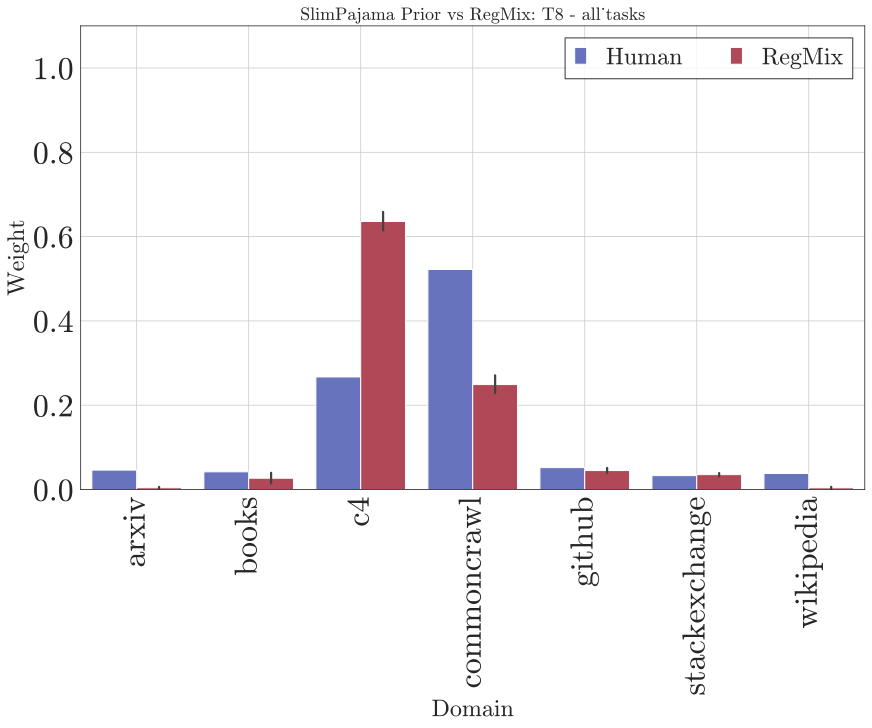


Simulating for T9...
Top-128 samples shape: (128, 7)

Optimal data mixture for T9 - 6_tasks_without_kodcode_gsm8k:
       Domain  6_tasks_without_kodcode_gsm8k Weight
        arxiv                              0.018193
        books                              0.149363
           c4                              0.597515
  commoncrawl                              0.232676
       github                              0.000067
stackexchange                              0.001594
    wikipedia                              0.000593
train_dw: "0.02,0.15,0.60,0.23,0.00,0.00,0.00"


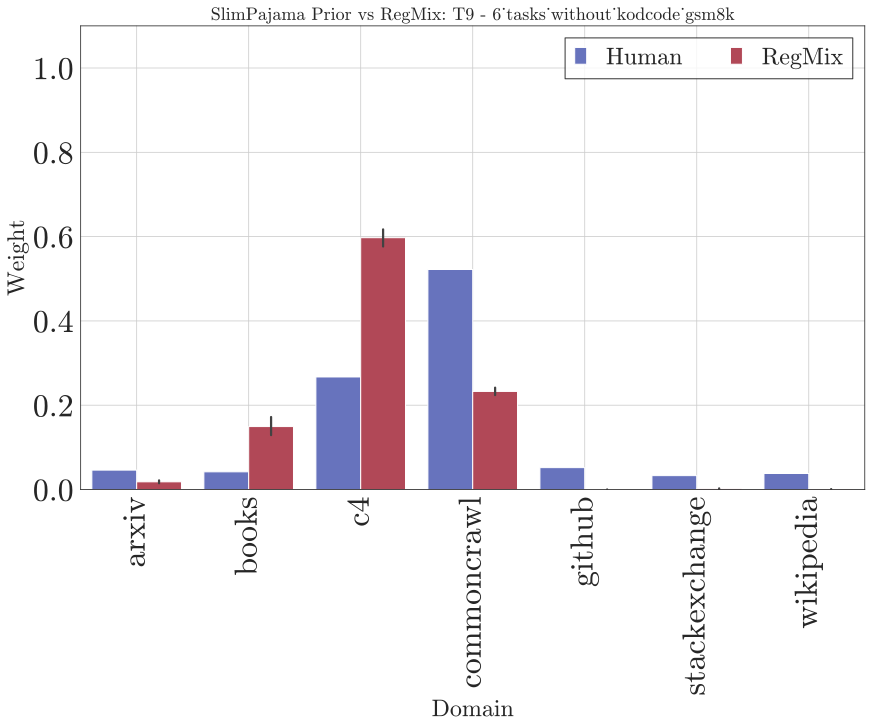

In [17]:
# Simulation for different metrics with SlimPajama distribution
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yaml

# Set random seed for reproducibility
np.random.seed(42)

# SlimPajama domain names and distribution
slimpajama_domains = [
    "train_slimpajama_arxiv",
    "train_slimpajama_books",
    "train_slimpajama_c4",
    "train_slimpajama_commoncrawl",
    "train_slimpajama_github", 
    "train_slimpajama_stackexchange",
    "train_slimpajama_wikipedia"
]

# Domain short names for JSON format
domain_short_names = [
    "arxiv",
    "book",
    "c4",
    "cc",
    "github",
    "stackexchange",
    "wikipedia"
]

# SlimPajama original distribution weights
slimpajama_prior_dist = [0.046, 0.042, 0.267, 0.522, 0.052, 0.033, 0.038]

# Generate samples from Dirichlet distribution based on SlimPajama distribution
samples = np.random.dirichlet(np.array(slimpajama_prior_dist) * 1, 100000)
print(f"Sample shape: {samples.shape}")

# Function to simulate and visualize for a specific metric
def simulate_and_visualize(predictor, ablation_id, k=128):
    if ablation_id == 'commoncrawl':
       config = ablation_configs['T8']
       metric_name = 'Commoncrawl'
    else:
        config = ablation_configs[ablation_id]
        metric_name = config['name']
    
    # Predict using the given model
    simulation = predictor.predict(samples)
    
    # Histogram of predictions
    plt.figure(figsize=(10, 6))
    plt.hist(simulation, bins=32)
    plt.xlabel('Pred Loss')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Predicted {metric_name} Loss')
    plt.savefig(f'../misc/slimpajama_hist_{ablation_id.lower()}.png')
    plt.close()
    
    # Find optimal data mixture (top-k samples with lowest predicted loss)
    top_k_indices = np.argsort(simulation)[:k]
    top_k_samples = samples[top_k_indices]
    print(f"Top-{k} samples shape: {top_k_samples.shape}")
    
    # Calculate optimal data mixture
    optimal_data_mixture = np.mean(top_k_samples, axis=0)
    
    # Create and display a nicely formatted DataFrame for the optimal mixture
    optimal_mix_df = pd.DataFrame({
        'Domain': [domain.split('train_slimpajama_')[-1] for domain in slimpajama_domains],
        f'{metric_name} Weight': optimal_data_mixture
    })

    print(f"\nOptimal data mixture for {ablation_id} - {metric_name}:")
    print(optimal_mix_df.to_string(index=False))
    
    # Generate JSON-ready train_dw string
    train_dw = ",".join([f"{w:.2f}" for w in optimal_data_mixture])
    print(f"train_dw: \"{train_dw}\"")
    
    # Create dataframe for visualization
    df = pd.DataFrame(
        data=np.concatenate([np.array([slimpajama_prior_dist]), top_k_samples], axis=0), 
        columns=[domain.split('train_slimpajama_')[-1] for domain in slimpajama_domains]
    )
    df = pd.melt(df)
    df['type'] = (['Human'] + ['RegMix'] * top_k_samples.shape[0]) * len(slimpajama_domains)
    
    # Visualization
    plt.rc('axes', unicode_minus=False)
    plt.rcParams.update({
        'text.usetex': False,
        'font.family': 'serif',
        'font.serif': 'cmr10',
        'mathtext.fontset': 'cm',
    })
    
    fig, ax = plt.subplots(figsize=(12, 10), layout='compressed')
    
    pal = {
        'Human': '#5969CB',
        'RegMix': '#C3364A',
    }
    
    sns.barplot(
        data=df,
        x='variable',
        y='value',
        hue='type',
        palette=pal
    )
    
    ax.tick_params(axis='x', labelrotation=90)
    ax.legend(
        edgecolor='black',
        fancybox=False,
        prop={'size': 24},
        handlelength=0.5,
        ncol=2,
    )
    
    ax.grid(True)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel('Domain', fontdict={'size': 24}) 
    ax.set_ylabel('Weight', fontdict={'size': 24})  
    ax.set_title(f'SlimPajama Prior vs RegMix: {ablation_id} - {metric_name}', fontdict={'size': 18})  
    plt.show()
    plt.close()
    
    # Save the optimal weights in a format for easy reference
    optimal_mixture_dict = {}
    for domain, weight in zip(slimpajama_domains, optimal_data_mixture):
        optimal_mixture_dict[domain] = float(weight)
    
    # Save to a separate file for easy reference
    optimal_df = pd.DataFrame({
        'Domain': slimpajama_domains,
        'Weight': optimal_data_mixture
    })
    # optimal_df.to_csv(f'../misc/slimpajama_optimal_{ablation_id.lower()}.csv', index=False)
    
    # Create and save JSON config
    json_config = {
        "dataset": f"slim_ood-{'-'.join(config['metrics'])}",
        "train_domains": ",".join(domain_short_names),
        "tgt_domains": ','.join(config['metrics']),
        "max_steps": 20000,
        "train_dw": train_dw,
        "tgt_dw": None,
        "val_dw": None,
        "max_train_samples": None,
        "max_eval_samples": 5000,
        "max_token_length": 512,
        "seed": 16,
        "preprocessing_num_workers": 2,
        "model_name_or_path": None,
        "model_type": "gpt2",
        "config_overrides": "n_positions=512,n_embd=768,n_layer=12,n_head=12",
        "run_name": f"REGMIX-125M",
        "output_dir": "/mloscratch/homes/glarou/DoGE/regmix/multi_doge/exp",
        "do_train": True,
        "do_eval": True,
        "do_predict": False,
        "learning_rate": 0.0005,
        "weight_decay": 0.01,
        "reweight_train": "None",
        "reweight_tgt": "None",
        "reweight_train_iters": 0,
        "reweight_tgt_iters": 0,
        "ref_model": None,
        "lr_scheduler_name": "linear_warmup_cosine",
        "lr_end": 0.0001,
        "reweight_eps": 0.0,
        "mu_train": 0.001,
        "mu_tgt": 0.0002,
        "max_grad_norm": 5.0,
        "per_device_train_batch_size": 16,
        "warmup_ratio": 0.05,
        "warmup_steps": 500,
        "save_steps": 5000,
        "eval_steps": 500,
        "gradient_accumulation_steps": 2,
        "save_strategy": "steps",
        "evaluation_strategy": "steps",
        "logging_steps": 50,
        "save_total_limit": 10,
        "ddp_find_unused_parameters": False,
        "use_cpu": False,
        "compute_pertoken_losses": False,
        "overwrite_output_dir": False
    }
    
    # Save the JSON config to a file
    with open(f'../misc/configs/{ablation_id}-regmix.json', 'w') as f:
        import json
        json.dump(json_config, f, indent=2)
    
    return optimal_data_mixture, optimal_mixture_dict, json_config

# Run simulation for each ablation configuration
print("\nRunning simulations for each ablation configuration...")
optimal_mixtures = {}
optimal_mixture_dicts = {}
json_configs = {}

print(f"\nSimulating for commoncrawl...")
optimal_mixtures['commoncrawl'], optimal_mixture_dicts['commoncrawl'], json_configs['commoncrawl'] = simulate_and_visualize(all_predictors['commoncrawl'], 'commoncrawl')

for ablation_id, predictor in all_predictors.items():
    if ablation_id in ablation_configs:
        print(f"\nSimulating for {ablation_id}...")
        optimal_mixtures[ablation_id], optimal_mixture_dicts[ablation_id], json_configs[ablation_id] = simulate_and_visualize(predictor, ablation_id)



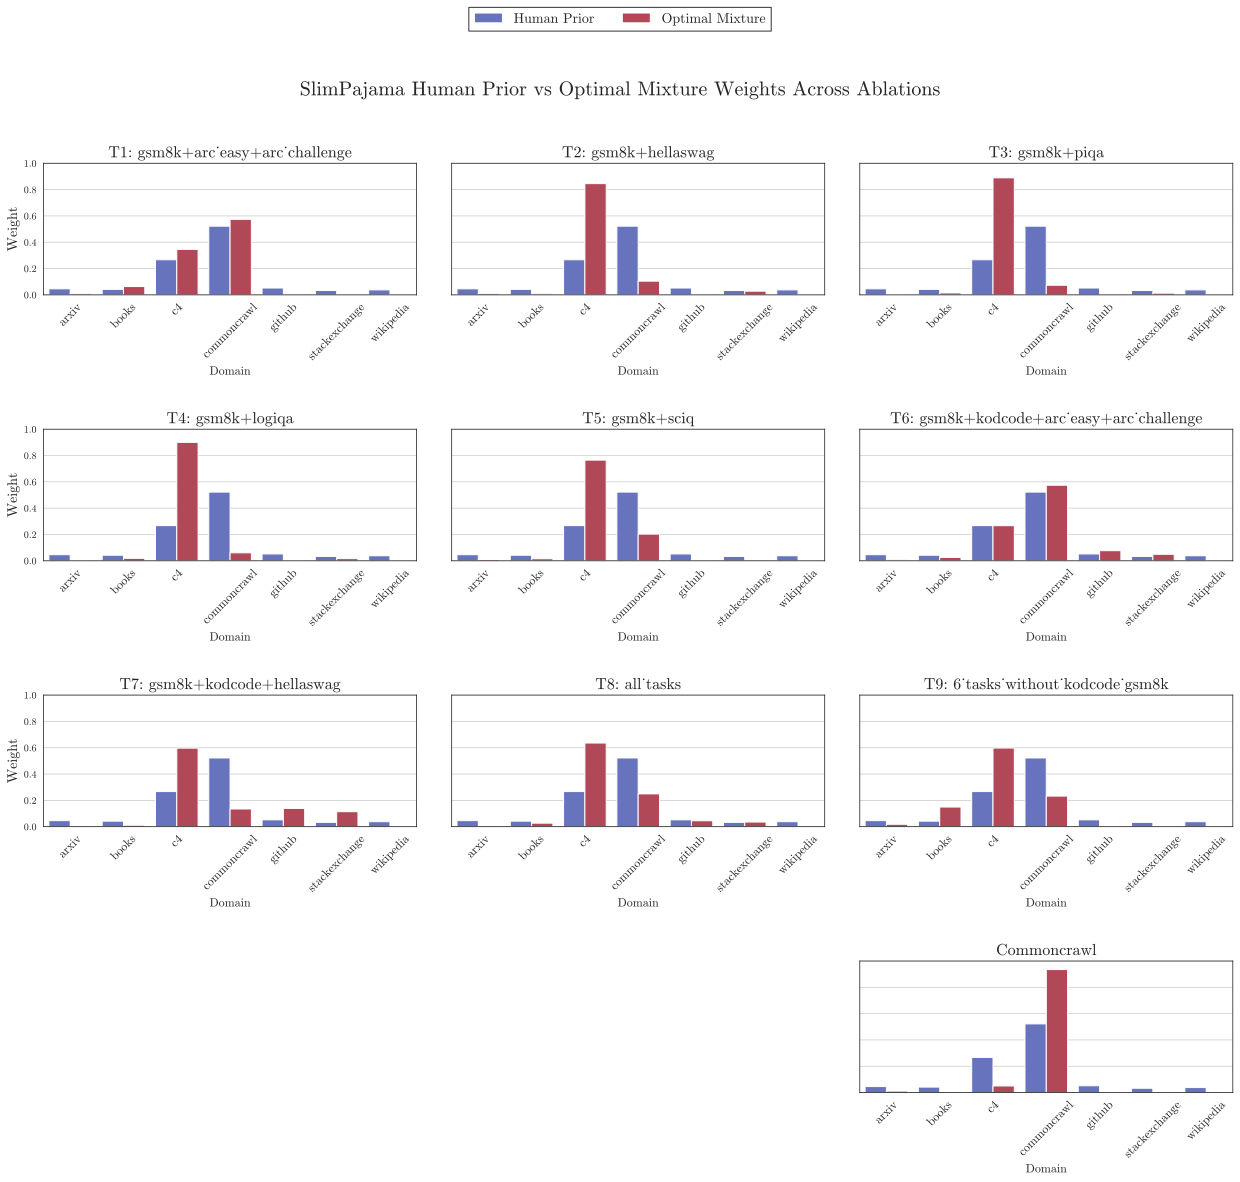

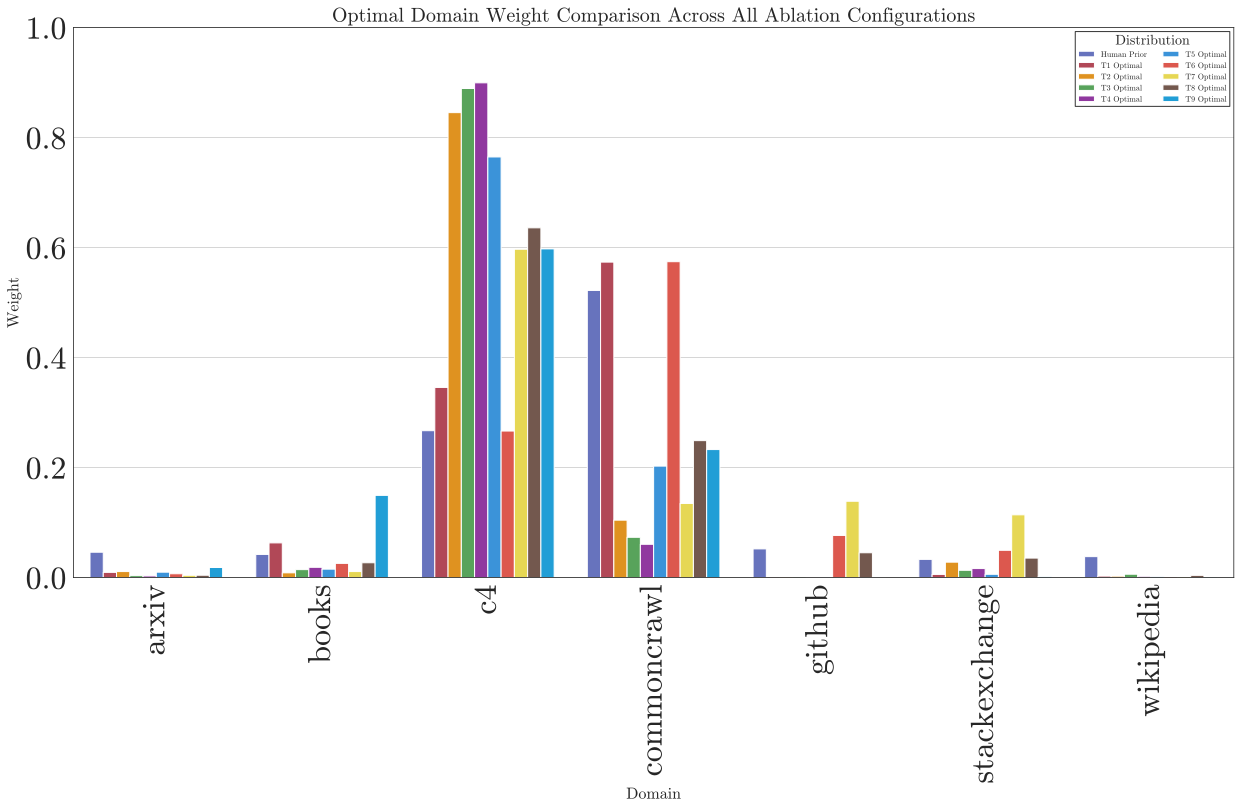

SlimPajama simulation with T1-T9 ablation configurations complete. Config files and plots saved as PNG.


In [33]:
def plot_all_ablations_comparison():
    """
    Create a single plot with subplots for each ablation configuration compared to "human" weights.
    """
    # Filter to only include T1-T9 ablations (exclude Commoncrawl)
    t_ablations = {k: v for k, v in ablation_configs.items() if k.startswith('T')}
    n_ablations = len(t_ablations) + 1
    
    # Set up grid layout
    n_cols = 3
    n_rows = (n_ablations + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), sharey=True)
    axes = axes.flatten()
    
    # Set up domain labels for x-axis (shorter names for better display)
    domain_labels = [domain.split('train_slimpajama_')[-1] for domain in slimpajama_domains]
    
    # Color palette
    pal = {
        'Human Prior': '#5969CB',
        'Optimal Mixture': '#C3364A',
    }
    
    
    # Plot each ablation configuration
    for i, (ablation_id, config) in enumerate(t_ablations.items()):
        if i < len(axes) and ablation_id in optimal_mixtures:
            ax = axes[i]
            
            # Create a DataFrame for easier plotting
            plot_df = pd.DataFrame({
                'Domain': domain_labels,
                'Human Prior': slimpajama_prior_dist,
                'Optimal Mixture': optimal_mixtures[ablation_id]
            })
            
            # Reshape for seaborn
            plot_df_melted = pd.melt(plot_df, id_vars=['Domain'], 
                                    value_vars=['Human Prior', 'Optimal Mixture'], 
                                    var_name='Distribution', value_name='Weight')
            
            # Plot the bars
            sns.barplot(data=plot_df_melted, x='Domain', y='Weight', hue='Distribution', 
                        palette=pal, ax=ax)
            
            # Customize the plot
            ax.set_title(f'{ablation_id}: {config["name"]}', fontsize=16)
            ax.set_ylim(0, 1)  
            ax.tick_params(axis='x', rotation=45, labelsize=12)
            ax.tick_params(axis='y', labelsize=10)
            # Only show y-label on the leftmost subplots
            if i % n_cols == 0:
                ax.set_ylabel('Weight', fontsize=14)
            else:
                ax.set_ylabel('')
            
            ax.set_xlabel('Domain', fontsize=12)
            ax.grid(True, axis='y')

    # add commoncrawl
    ax = axes[-1]  
    plot_df = pd.DataFrame({
        'Domain': domain_labels,
        'Human Prior': slimpajama_prior_dist,
        'Optimal Mixture': optimal_mixtures['commoncrawl']
    })
    plot_df_melted = pd.melt(plot_df, id_vars=['Domain'],
                            value_vars=['Human Prior', 'Optimal Mixture'], 
                            var_name='Distribution', value_name='Weight')
    sns.barplot(data=plot_df_melted, x='Domain', y='Weight', hue='Distribution',
                palette=pal, ax=ax)
    ax.set_title(f'Commoncrawl', fontsize=16)
    ax.set_ylim(0, 1)  
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylabel('Weight', fontsize=14)
    ax.set_xlabel('Domain', fontsize=12)
    ax.grid(True, axis='y')
    

    # Hide any unused subplots
    for i in range(len(t_ablations), len(axes)):
        axes[i].set_visible(False)
    axes[-1].set_visible(True)  # Ensure the last one is visible
    
    # Add a common legend at the top
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=14, 
               fancybox=False, edgecolor='black', bbox_to_anchor=(0.5, 1.05))
    
    for ax in axes:
        if ax.get_legend() is not None:
            ax.get_legend().remove()
    
    fig.suptitle('SlimPajama Human Prior vs Optimal Mixture Weights Across Ablations', fontsize=20)
    
    plt.tight_layout()
    plt.show()
    plt.savefig('../misc/all_ablations_comparison.png', 
                bbox_inches='tight', pad_inches=0.1, dpi=300)
    
    plt.close()

def plot_all_weights_in_single_barplot():
    """
    Create a single barplot showing all the different domain weights for each configuration.
    """
    # Set up domain labels for x-axis (shorter names for better display)
    domain_labels = [domain.split('train_slimpajama_')[-1] for domain in slimpajama_domains]
    
    # Filter to only include T1-T9 ablations
    t_ablations = {k: v for k, v in ablation_configs.items() if k.startswith('T')}
    
    # Create data for all ablations and human
    plot_data = {'Domain': [], 'Distribution': [], 'Weight': []}
    
    # Add human distribution
    for domain, weight in zip(domain_labels, slimpajama_prior_dist):
        plot_data['Domain'].append(domain)
        plot_data['Distribution'].append('Human Prior')
        plot_data['Weight'].append(weight)
    
    # Add all ablation distributions
    for ablation_id, config in t_ablations.items():
        if ablation_id in optimal_mixtures:
            for domain, weight in zip(domain_labels, optimal_mixtures[ablation_id]):
                plot_data['Domain'].append(domain)
                plot_data['Distribution'].append(f'{ablation_id} Optimal')
                plot_data['Weight'].append(weight)
    
    # Convert to DataFrame
    plot_df = pd.DataFrame(plot_data)
    
    # Create color palette with a distinct color for each distribution
    distributions = ['Human Prior'] + [f'{aid} Optimal' for aid in t_ablations.keys() if aid in optimal_mixtures]
    colors = ['#5969CB', '#C3364A', '#FF9800', '#4CAF50', '#9C27B0', 
              '#2196F3', '#F44336', '#FFEB3B', '#795548', '#03A9F4']
    pal = {dist: color for dist, color in zip(distributions, colors[:len(distributions)])}
    
    # Create the figure
    plt.figure(figsize=(18, 12))
    
    # Create the grouped bar chart
    ax = sns.barplot(data=plot_df, x='Domain', y='Weight', hue='Distribution', 
                    palette=pal)
    
    # Customize the plot
    ax.set_title('Optimal Domain Weight Comparison Across All Ablation Configurations', fontsize=20)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Domain', fontsize=16)
    ax.set_ylabel('Weight', fontsize=16)
    ax.tick_params(axis='x', rotation=90)
    ax.grid(True, axis='y')
    
    # Customize the legend
    plt.legend(title='Distribution', fontsize=8, title_fontsize=14,
               edgecolor='black', fancybox=False, ncol=2, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    plt.savefig('../misc/all_optimal_weights_comparison.png', 
                bbox_inches='tight', pad_inches=0.1, dpi=300)
    
    plt.close()

# Generate both plots
plot_all_ablations_comparison()
plot_all_weights_in_single_barplot()

print("SlimPajama simulation with T1-T9 ablation configurations complete. Config files and plots saved as PNG.")